<a href="https://colab.research.google.com/github/RadhikaRM/BikeShareDemandprediction/blob/main/Pricerangeprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the competitive mobile phone market companies want 
to ***understand sales data of mobile phones and factors which drive the prices.*** The objective is to f*ind out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price*. 
In this problem, we do not have to predict the actual price but a price range indicating how high the price is. 

# ***Data Description***

* Battery_power - Total energy a battery can store in one time measured in mAh 
* **Blue - Has bluetooth or not**
* Clock_speed - speed at which microprocessor executes instructions 
* **Dual_sim - Has dual sim support or not**
* Fc - Front Camera mega pixels 
* **Four_g - Has 4G or not**
* Int_memory - Internal Memory in Gigabytes 
* M_dep - Mobile Depth in cm 
* Mobile_wt - Weight of mobile phone 
* N_cores - Number of cores of processor 
* Pc - Primary Camera mega pixels 
* Px_height - Pixel Resolution Height 
* Px_width - Pixel Resolution Width 
* Ram - Random Access Memory in Mega Bytes 
* Sc_h - Screen Height of mobile in cm 
* Sc_w - Screen Width of mobile in cm 
* Talk_time - longest time that a single battery charge will last when you are
* **Three_g - Has 3G or not** 
* **Touch_screen - Has touch screen or not** 
* **Wifi - Has wifi or not** 
* **Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).**

# ***Importing the data***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Mobile_price_prediction/data_mobile_price_range.csv")

In [3]:
#diplaying the first 3 rows
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The dataset has 2000 rows and 21 columns.None of the columns contain null values

In [5]:
#Checking for duplicates
df[df.duplicated()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [6]:
#Number of unique elements in each column
for col in df.columns:
  print(f'{col} has {df[col].nunique()} unique elements and they are:\n {df[col].unique()}')

battery_power has 1094 unique elements and they are:
 [ 842 1021  563 ... 1139 1467  858]
blue has 2 unique elements and they are:
 [0 1]
clock_speed has 26 unique elements and they are:
 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim has 2 unique elements and they are:
 [0 1]
fc has 20 unique elements and they are:
 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g has 2 unique elements and they are:
 [0 1]
int_memory has 63 unique elements and they are:
 [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep has 10 unique elements and they are:
 [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt has 121 unique elements and they are:
 [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 1

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [8]:
len(df[df['sc_w']==0.0])

180

The data contains 180 mobiles with zero screen width,this is not possible in real.

In [9]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [10]:
print(f'The numerical columns are {numerical_columns}\n Categorical columns are : {categorical_columns}')

The numerical columns are ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
 Categorical columns are : ['dual_sim', 'blue', 'touch_screen', 'wifi', 'three_g', 'four_g', 'price_range']


# ***Univariate analysis***

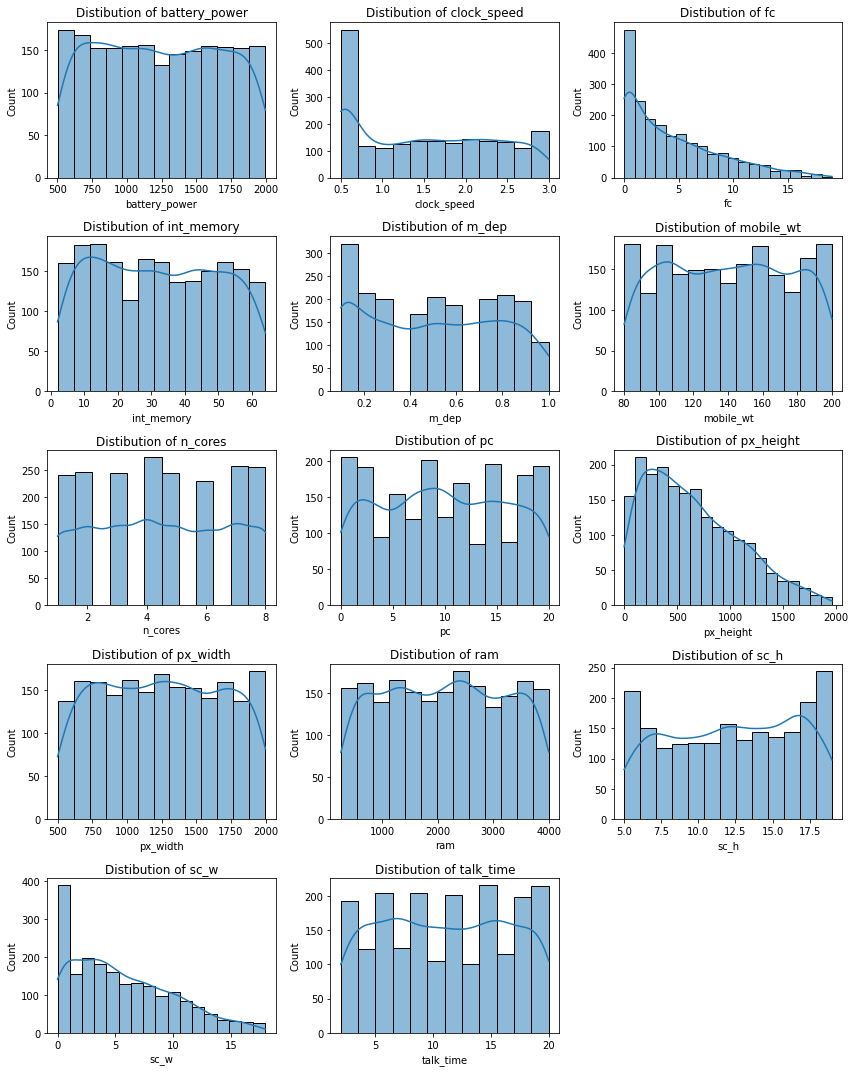

In [11]:
fig = plt.figure(figsize=(12,15))
c=1
for i in numerical_columns:
  plt.subplot(5,3, c)
  sns.histplot(df[i],kde=True)
  plt.title('Distibution of {}'.format(i))
  c+=1
plt.tight_layout()  

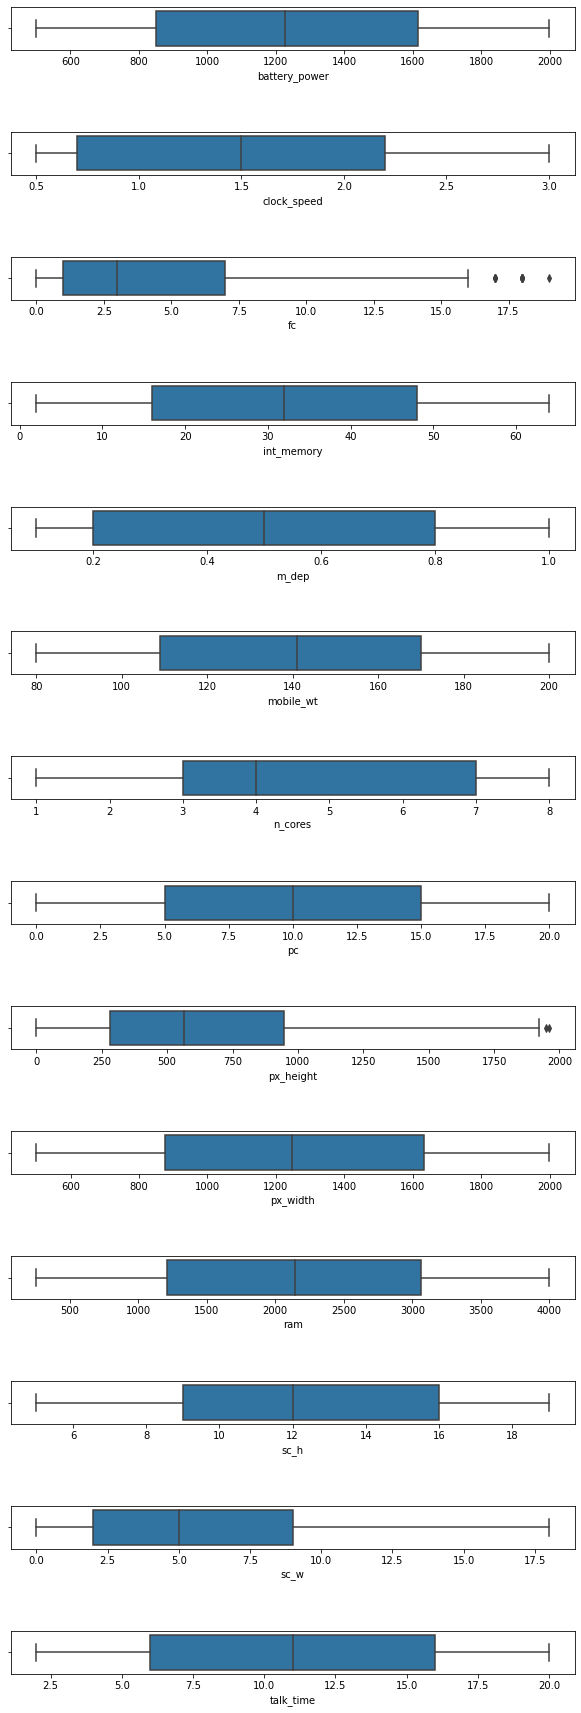

In [12]:
#Checking for outliers

fig = plt.figure(figsize=(8,25))
c=1
for i in numerical_columns :
    plt.subplot(15,1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The numerical columns do not have values which are extreme and unusual

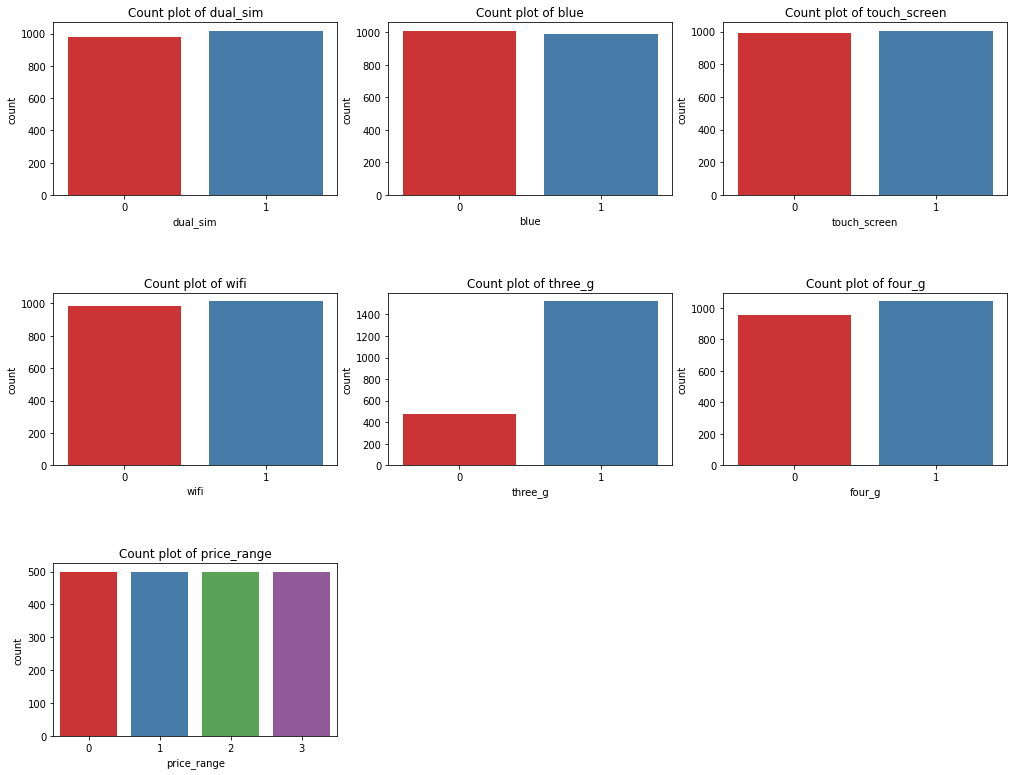

In [13]:
#Count plot of categorical columns
#Checking for outliers

fig = plt.figure(figsize=(14,14))
c=1
for i in categorical_columns :
    plt.subplot(4,3, c)
    sns.countplot(x=i,data=df,palette='Set1')
    plt.title('Count plot of {}'.format(i))
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


* Most of the phones currently available in the market  have 3G support
* There is a similar count of records for phones belonging to all price ranges in the given data.

Text(0, 0.5, 'Number of phones')

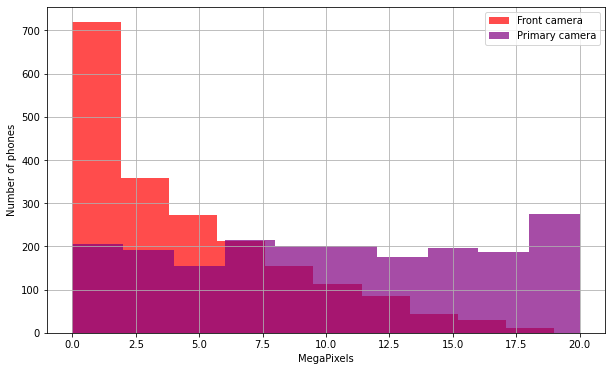

In [14]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.7,color='Red',label='Front camera')
df['pc'].hist(alpha=0.7,color='Purple',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')
plt.ylabel('Number of phones')

*  Front cameras present in majority of phones have poor quality(below 2.5 MP)

# ***Bivariate and Multivariate analysis***

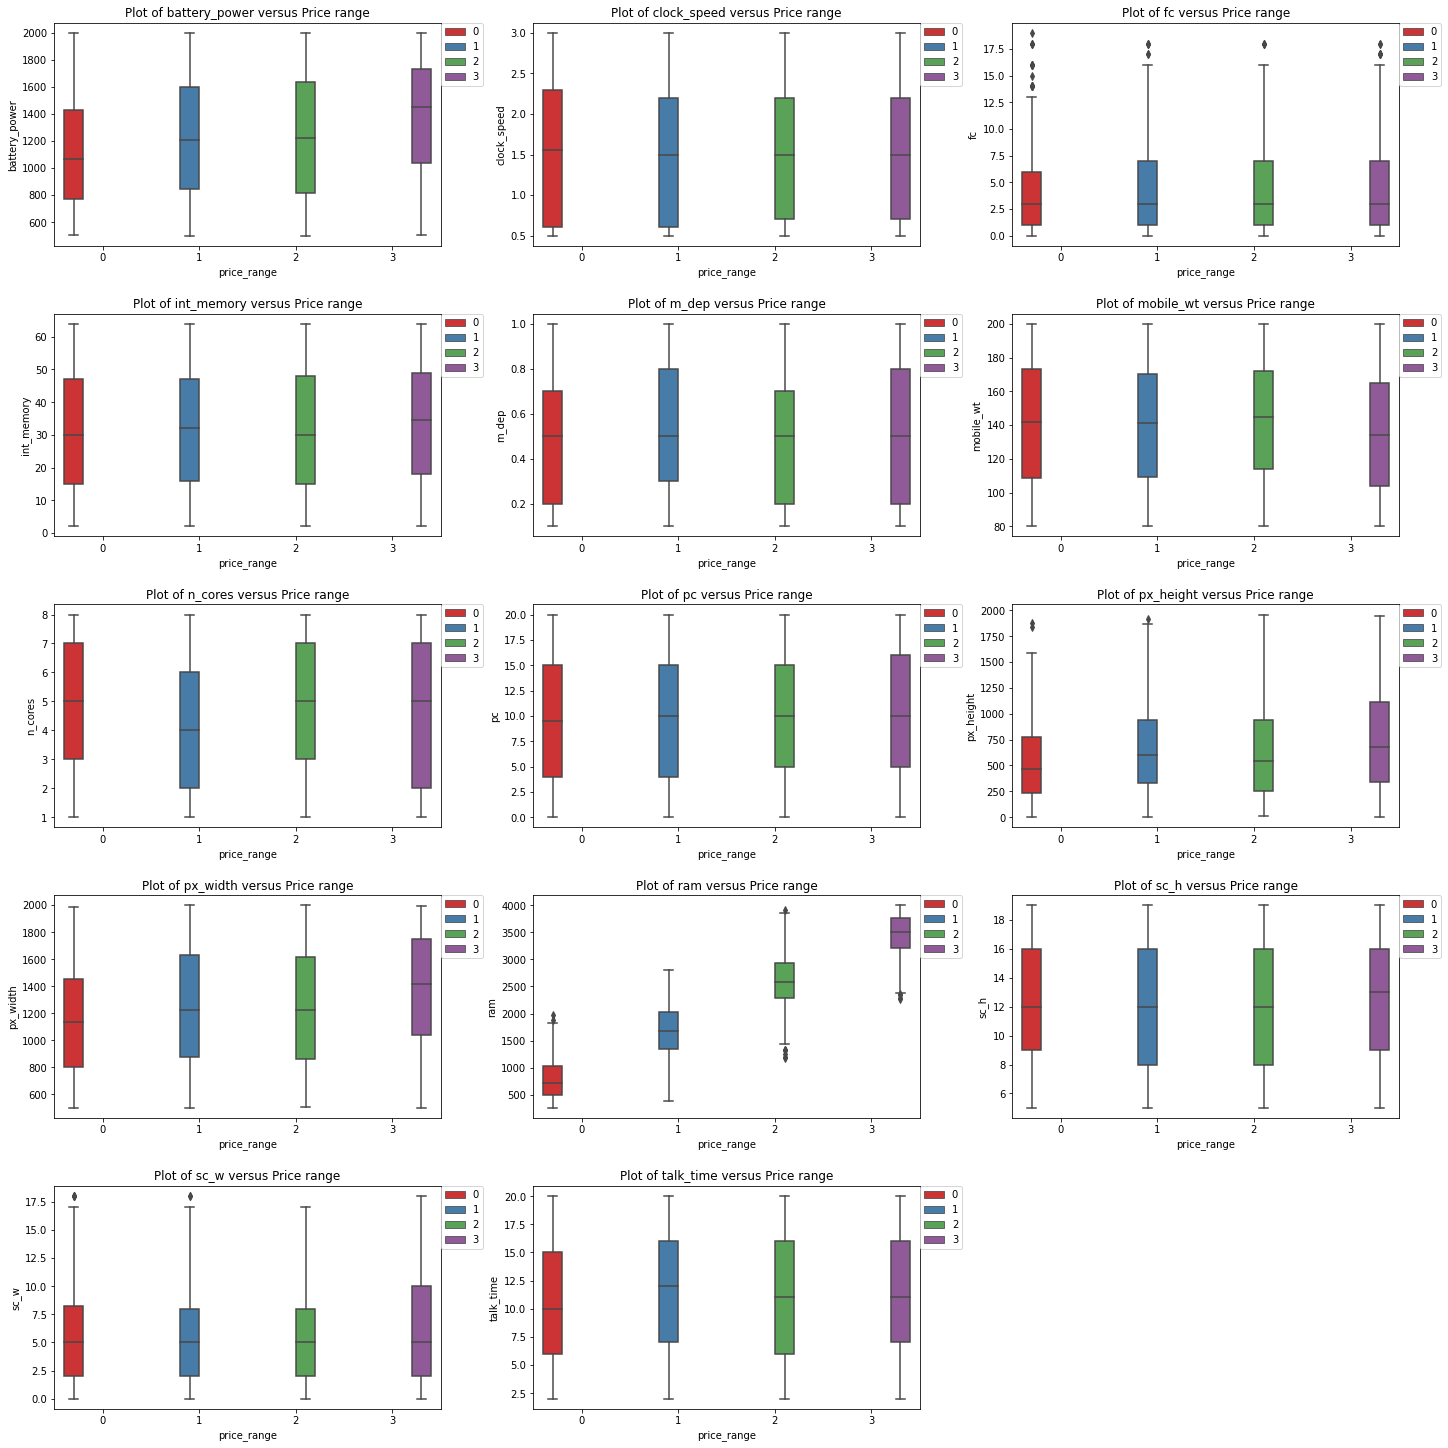

In [15]:
fig = plt.figure(figsize=(20,20))
c=1
for i in numerical_columns :
    plt.subplot(5,3, c)
    sns.boxplot(x='price_range',y=i,data=df,hue='price_range',palette='Set1')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout(pad=0.3, w_pad=0.3, h_pad=2.0)
  

* Higher priced phones have higher RAM and higher battery power

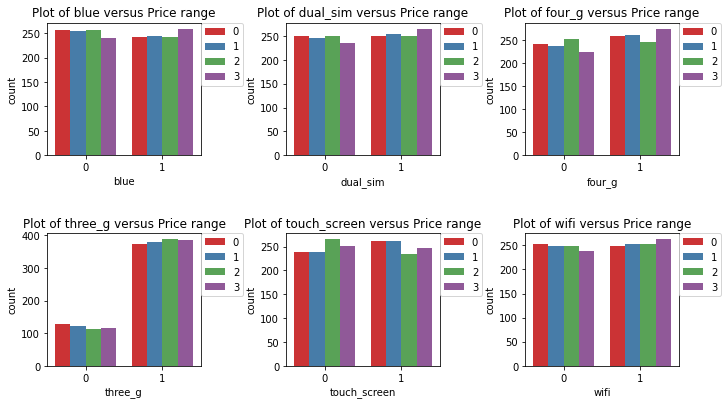

In [16]:
fig = plt.figure(figsize=(10,8))
c=1
for i in ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'] :
    plt.subplot(3,3, c)
    sns.countplot(x=i,data=df,hue='price_range',palette='Set1')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
    plt.title(f'Plot of {i} versus Price range')
    c = c + 1
plt.tight_layout(pad=0.3, w_pad=0.3, h_pad=3.0)

# ***Feature engineering***

In [17]:
# making a copy of our dataset
df_1 = df.copy()

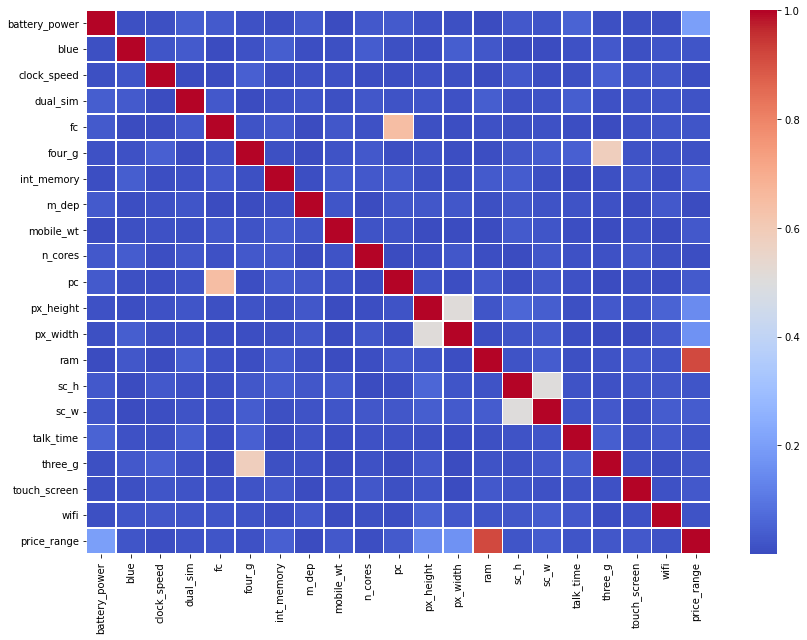

In [18]:
# heatmap for checking multi-collinearity
plt.figure(figsize=[14,10])
sns.heatmap(data=abs(df_1.corr()), annot=False, cmap='coolwarm', linewidths=0.5)

In [19]:
# calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  # the independent variables set
  X = dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
check_vif(df_1)

          feature        VIF
0   battery_power   9.852329
1            blue   1.987643
2     clock_speed   4.353409
3        dual_sim   2.038823
4              fc   3.413647
5          four_g   3.194364
6      int_memory   3.979406
7           m_dep   3.952634
8       mobile_wt  14.709826
9         n_cores   4.707757
10             pc   6.251274
11      px_height   4.626185
12       px_width  12.018345
13            ram  39.806450
14           sc_h  11.817054
15           sc_w   3.721933
16      talk_time   4.916936
17        three_g   6.219108
18   touch_screen   2.000108
19           wifi   2.035796
20    price_range  25.874258


In [21]:
#df_1['screen_resolution'] = df_1['px_height'] * df_1['px_width']

In [22]:
#df_1['screen_area'] = df_1['sc_h'] * df_1['sc_w']

In [23]:
#df_1.drop(['px_height', 'px_width', 'sc_h', 'sc_w'], axis=1, inplace=True)

In [24]:
#check_vif(df_1)

*Tried dropping and transforming some features but the **VIF** score didn't improve. We cannot transform any further as all features are important.*

In [25]:
# seperating independent and dependent variables
X = df_1.drop(['price_range'],axis=1)
y = df_1['price_range']

In [26]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  


In [27]:
#feature Scaling  
from sklearn.preprocessing import MinMaxScaler    
min_max_scale= MinMaxScaler()
X_train[numerical_columns]= min_max_scale.fit_transform(X_train[numerical_columns])    
X_test[numerical_columns]= min_max_scale.transform(X_test[numerical_columns])  

In [28]:
X_train.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1045,0.020040,0,0.24,0,0.526316,0,0.983871,0.666667,0.908333,0.857143,0.7,0.073980,0.936582,0.722074,0.857143,0.055556,0.944444,0,1,0
937,0.175685,1,0.28,1,0.052632,0,0.177419,1.000000,0.600000,1.000000,0.1,0.184184,0.007343,0.772849,0.928571,0.388889,0.222222,1,1,0


# ***K Nearest Neighbors Classifier***

* Untuned KNN Classifier

In [29]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier( )  
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [30]:
# prediction for training set
y_pred_train = knn.predict(X_train)

In [31]:
# prediction fot testing set
y_pred_test =knn.predict(X_test)

In [32]:
def classification_performance(y_,y_pred):
  '''

  '''
  from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
  #accuracy
  print("Accuracy score is {}".format(accuracy_score(y_, y_pred)))
  #confusion matrix and classification report for the test/train set
  print("-"*60)
  print("Confusion matrix")
  print(confusion_matrix(y_, y_pred))
  print("-"*60)
  print('Classification report')
  print(classification_report(y_, y_pred,digits=3))

In [33]:
# Accuracy score,confusion matrix and classification report for training set
classification_performance(y_train,y_pred_train)

Accuracy score is 0.604
------------------------------------------------------------
Confusion matrix
[[295  59  21   1]
 [ 99 234  43  14]
 [ 49 103 190  33]
 [  6  56 110 187]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.657     0.785     0.715       376
           1      0.518     0.600     0.556       390
           2      0.522     0.507     0.514       375
           3      0.796     0.521     0.630       359

    accuracy                          0.604      1500
   macro avg      0.623     0.603     0.604      1500
weighted avg      0.620     0.604     0.603      1500



In [34]:
# Accuracy score,confusion matrix and classification report for testing set
classification_performance(y_test,y_pred_test)

Accuracy score is 0.38
------------------------------------------------------------
Confusion matrix
[[62 48 11  3]
 [42 39 24  5]
 [18 45 42 20]
 [ 7 25 62 47]]
------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0      0.481     0.500     0.490       124
           1      0.248     0.355     0.292       110
           2      0.302     0.336     0.318       125
           3      0.627     0.333     0.435       141

    accuracy                          0.380       500
   macro avg      0.414     0.381     0.384       500
weighted avg      0.426     0.380     0.388       500



 * *KNN classifier with hyperparameter tuning*

In [35]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#Hyperparameter tuning with GridSearchCV for knn
knn = KNeighborsClassifier(algorithm='auto')
parameters_grid = { 'n_neighbors': list(range(1,50)),'leaf_size': list(range(20,50)),'p': (1,2),'weights': ('uniform', 'distance')}                 
# Performing 3-fold Grid Search Cross-validation on the knn model
knn_cv = GridSearchCV(estimator=knn,param_grid=parameters_grid,scoring = 'accuracy',n_jobs = -1,cv = 3)
knn_cv.fit(X_train,y_train)

In [ ]:
print(f'The optimal value for hyperparameters are : {knn_cv.best_params_} \n')

In [ ]:
best_knn=knn_cv.best_estimator_
best_knn.fit(X_train, y_train)  

In [ ]:
# prediction for training set
y_pred_train = best_knn.predict(X_train)
# prediction fot testing set
y_pred_test =best_knn.predict(X_test)

In [ ]:
# Accuracy score,confusion matrix and classification report for training set
classification_performance(y_train,y_pred_train)

In [ ]:
# Accuracy score,confusion matrix and classification report for testing set
print('Evaluating the performance on Test data')
classification_performance(y_test,y_pred_test)